In [64]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib import figure
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,5.5)

#overall goal: correlation between overall budget and overall gross revenue

In [4]:
#read in data
df1 = pd.read_csv(r'C:\Users\adria\Documents\Movies\movies.csv')
df1.head(100)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Escape from New York,R,Action,1981,"July 10, 1981 (United States)",7.2,131000.0,John Carpenter,John Carpenter,Kurt Russell,United States,6000000.0,25244626.0,AVCO Embassy Pictures,99.0
96,The Evil Dead,NC-17,Horror,1981,"April 15, 1983 (United States)",7.5,192000.0,Sam Raimi,Sam Raimi,Bruce Campbell,United States,350000.0,2956630.0,Renaissance Pictures,85.0
97,Porky's,R,Comedy,1981,"March 19, 1982 (United States)",6.2,40000.0,Bob Clark,Bob Clark,Dan Monahan,Canada,2500000.0,111289673.0,Astral Bellevue Pathé,94.0
98,Blow Out,R,Crime,1981,"July 24, 1981 (United States)",7.4,47000.0,Brian De Palma,Brian De Palma,John Travolta,United States,18000000.0,12000000.0,Filmways Pictures,108.0


In [5]:
#clean up data first
df1.describe()
#nan_rows  = df1.loc[df1.isna().any(axis=1)]
#print(len(df1.index))
#there are 7668 rows of data
#print(nan_rows)

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [6]:
#find any rows with missing data using a for loop
for col in df1.columns:
    percent_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
df1.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
df1 = df1.dropna()

In [9]:
df1.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [10]:
df1['yearcorrect'] = df1['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [11]:
#Column Data types
df1.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [12]:
#get rid of .0 or the decimals (the float)
df1['budget'] = df1['budget'].astype('int64')
df1['gross'] = df1['gross'].astype('int64')

In [13]:
df1.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [14]:
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [15]:
#take note that year correct and released do not all match
df1[['yearcorrect', 'released']]

,yearcorrect,released
0,1980,"June 13, 1980 (United States)"
1,1980,"July 2, 1980 (United States)"
2,1980,"June 20, 1980 (United States)"
3,1980,"July 2, 1980 (United States)"
4,1980,"July 25, 1980 (United States)"
...,...,...
7648,2020,"January 17, 2020 (United States)"
7649,2020,"February 14, 2020 (United States)"
7650,2020,"January 17, 2020 (United States)"
7651,2020,"February 21, 2020 (United States)"


In [51]:
#order by gross revenue since that is the item in question

df1 = df1.sort_values(by=['gross'], inplace = False, ascending = False)

In [52]:
#look at all of the data: 
pd.set_option('display.max_rows', None)

In [53]:
#check for duplicates
df1['company'].drop_duplicates().sort_values(ascending = False)

7129    1474
5664    1473
4007    1472
6793    1471
6420    1470
3776    1469
3330    1468
520     1467
2213    1466
3698    1465
1180    1464
5180    1463
1321    1462
1329    1461
789     1460
5125    1459
5499    1458
4618    1457
4990    1456
5410    1455
5583    1454
6919    1453
4392    1452
4999    1451
425     1450
6674    1449
4272    1448
450     1447
3943    1446
2466    1445
2355    1444
6720    1443
5276    1442
4863    1441
5550    1440
4572    1439
6616    1438
1306    1437
1475    1436
7017    1435
1304    1434
5496    1433
6672    1432
4781    1431
7267    1430
2843    1429
6578    1428
2341    1427
5845    1426
7401    1425
222     1424
7480    1423
7494    1422
5075    1421
4975    1420
7420    1419
5272    1418
5409    1417
1115    1416
6647    1415
1307    1414
6896    1413
3471    1412
1894    1411
1716    1410
4964    1409
1522    1408
5302    1407
6540    1406
7018    1405
7263    1404
2504    1403
4827    1402
251     1401
6208    1400
7594    1399
5635    1398

In [22]:
#Hypothesis: the company name as well as budget spent will correlate with the overall gross revenue 

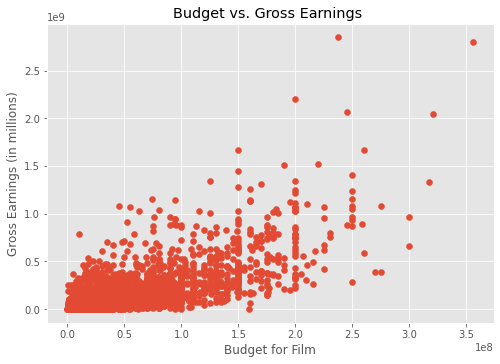

In [65]:
#making a scatter plot with budget vs gross
plt.title('Budget vs. Gross Earnings ')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings (in millions)') 
plt.scatter(x = df1['budget'], y = df1['gross'] )
plt.show()

In [31]:
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

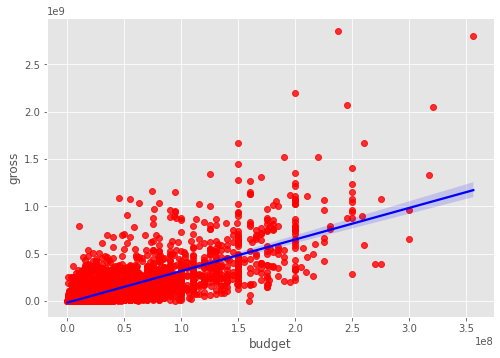

In [66]:
#Regression plot using SNS or Seaborn
#want to make trend line stand out than red dots
sns.regplot(x='budget', y = 'gross', data = df1, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

In [42]:
#now, look at correlation
df1.corr(method = 'pearson' ) #pearson correlation by default


#there is also kendall and spearman
#results show that budget and gorss have a relatively high coefficient

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [40]:
#kendall correlation
df1.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824,0.991304
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
yearcorrect,0.991304,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


In [41]:
df1.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
yearcorrect,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


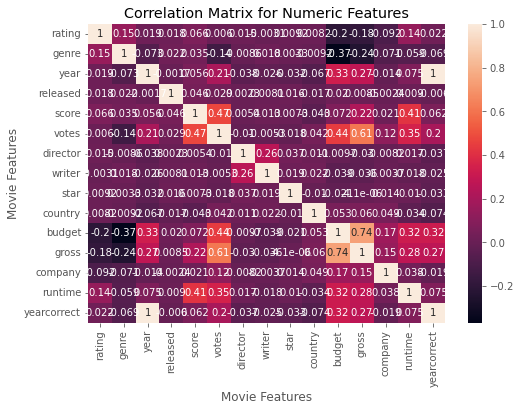

In [67]:
correlation_matrix = df1.corr(method = 'pearson' )

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [77]:
#company is not numeric (was not able to go into correlation matrix) so want to make it so
df_numerized = df1

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,Avengers: Endgame,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,Titanic,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,Avengers: Infinity War,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


In [55]:
df_numerized.dtypes

name           category
rating             int8
genre              int8
year              int64
released          int16
score           float64
votes           float64
director          int16
writer            int16
star              int16
country            int8
budget            int64
gross             int64
company           int16
runtime         float64
yearcorrect       int32
dtype: object

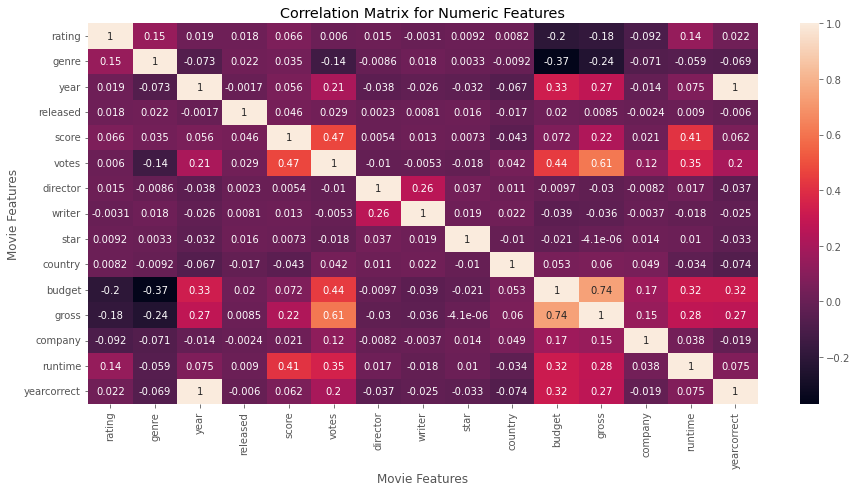

In [70]:
correlation_matrix = df_numerized.corr(method = 'pearson' )
plt.rcParams["figure.figsize"] = (15,7) #(width x Height)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [72]:
correlation_matrix = df_numerized.corr(method = 'pearson' )
corr_pairs = correlation_matrix.unstack()
corr_pairs

rating       rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
             budget        -0.203946
             gross         -0.181906
             company       -0.092357
             runtime        0.140792
             yearcorrect    0.022021
genre        rating         0.147796
             genre          1.000000
             year          -0.073167
             released       0.022142
             score          0.035106
             votes         -0.135990
             director      -0.008553
             writer         0.017578
             star           0.003341
             country       -0.009164
             budget        -0.368523
             gross         -0.244101
 

In [74]:
#get the correlation pairs with the highest correlation
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
company      genre         -0.071334
genre        company       -0.071334
             yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
score        country       -0.043051
country      score         -0.043051
budget       writer        -0.039466
w

In [76]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5] #here, making a new array made up of pairs greater than 0.5
high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#although company name did not have a high correlation with gross, we did find that it did with the number of votes for a move as well as the overall all budget. 